In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.self_supervised import *
from rsna_retro.contrastive_loss import *

Loading imports


In [2]:
torch.cuda.set_device(2)

In [3]:
dls = get_ss_data(512, splits=Meta.splits_stg1)

In [4]:
size=192
aug = get_aug_pipe(size, min_scale=0.5)
aug2 = get_aug_pipe(size, min_scale=0.3)
cb = SSCallback(BatchContrastiveLoss(XentContrastiveLoss()), size=size, aug_targ=aug, aug_pos=aug2, multi_loss=False)
# cb = SSCallback(BatchContrastiveLoss(ContrastiveLoss(margin=5)), size=size, aug_targ=aug, aug_pos=aug2, multi_loss=False)
learn = get_learner(dls, xresnet18, metrics=[], cbs=cb)

In [5]:
name = 'self_supervised_train_4_nocombined_xent_lessaug'

(0.33113112449646, 0.010964781977236271)

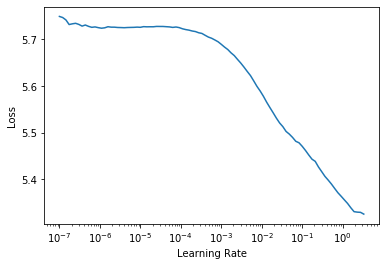

In [6]:
learn.lr_find()

In [6]:
learn.unfreeze()
learn.fit(3, lr=2e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,time
0,4.196970,4.490413,28:05
1,4.180123,4.453233,27:29
2,4.153061,4.368009,27:25


In [6]:
learn.load(f'runs/{name}-2')
learn.unfreeze()
learn.fit(8, lr=1e-3)
learn.save(f'runs/{name}-2')

epoch,train_loss,valid_loss,time
0,4.569477,4.664909,17:05
1,4.568696,4.658811,17:04
2,4.567553,4.657866,17:00
3,4.568576,4.667719,16:58
4,4.567777,4.652690,17:06
5,4.567153,4.653647,17:16
6,4.569132,4.657102,17:04
7,4.567258,4.656209,17:06


In [8]:
learn.load(f'runs/{name}-2')
learn.unfreeze()
learn.fit(8, lr=1e-3)
learn.save(f'runs/{name}-2')

KeyboardInterrupt: 

In [ ]:
learn.load(f'runs/{name}-1')
learn.dls = get_ss_data(192, splits=Meta.splits_stg1, img_dir=path_jpg)
cb.update_size(384)
do_fit(learn, 4, 4e-3)
learn.save(f'runs/{name}-2')